<a href="https://colab.research.google.com/github/riyan518z/notes_2/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/tip-amount.xlsx')
data

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14
5,6,51,5


<Axes: >

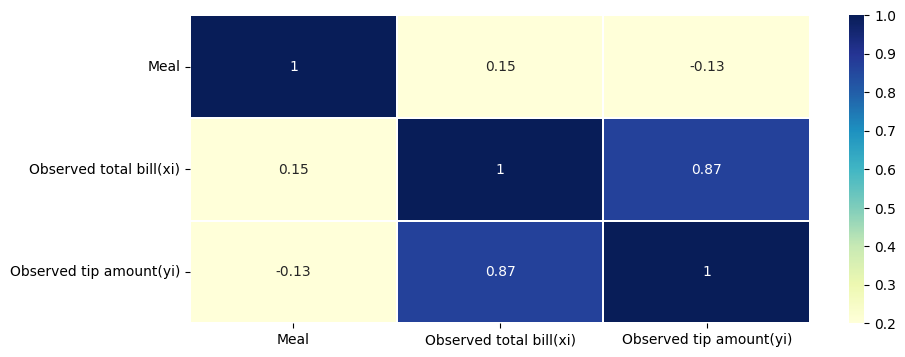

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=.2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y = data['Observed tip amount(yi)']
x = data.drop(['Observed tip amount(yi)'], axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)

from sklearn import linear_model
lr = linear_model.LinearRegression()


In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
x_test

,Meal,Observed total bill(xi)
0,1,34
1,2,108


In [ ]:
predictions

array([ 7.72756456, 15.46875446])

In [ ]:
new_data_point = pd.DataFrame({'Meal':[4,7],'Observed total bill(xi)': [90,150]})
predicted_tip_amount = model.predict(new_data_point)
predicted_tip_amount

array([11.62512484, 15.98837209])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is : \n',mean_squared_error(y_test,predictions))


MSE is : 
 4.892160668179483


In [ ]:
from sklearn.metrics import r2_score
print('R2 is : \n',r2_score(y_test,predictions))


R2 is : 
 0.8641066481061255


In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
data

df = pd.concat([data.data,data.target],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

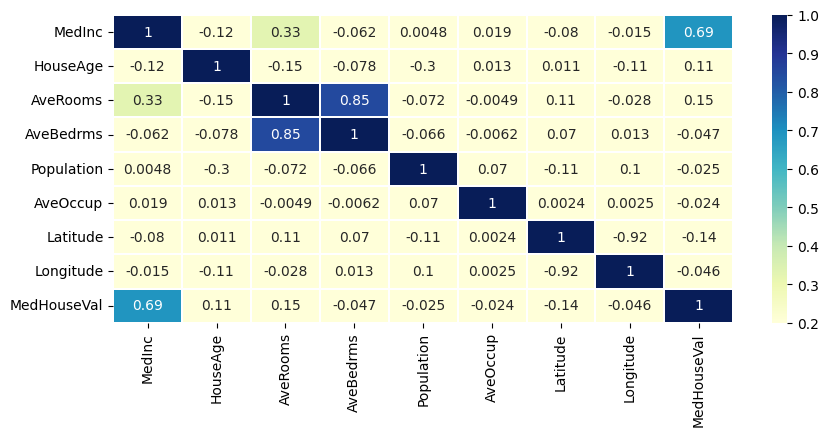

In [ ]:
corr_matrix = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,vmin=.2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
dff = df.select_dtypes(include='float64')
dff

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


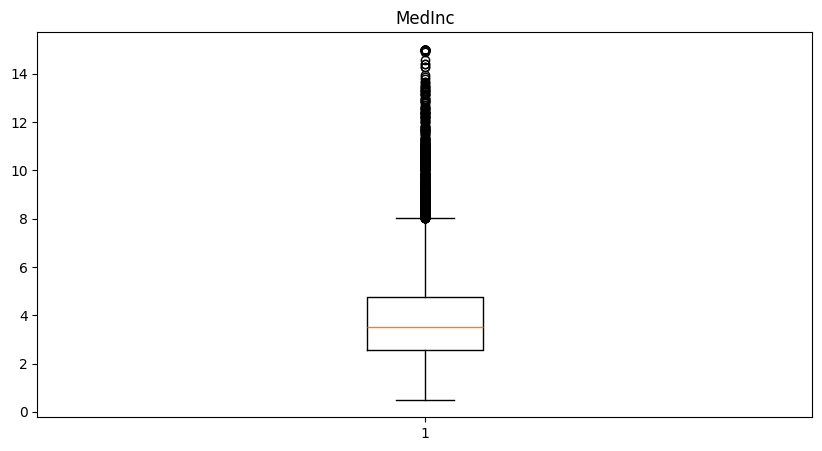

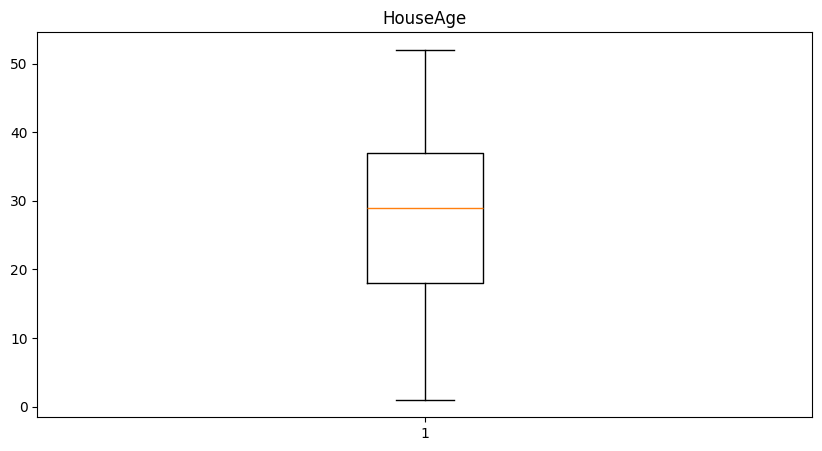

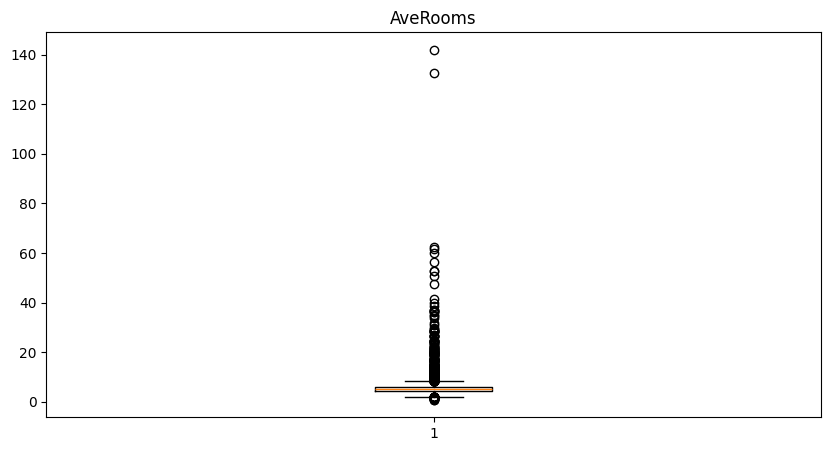

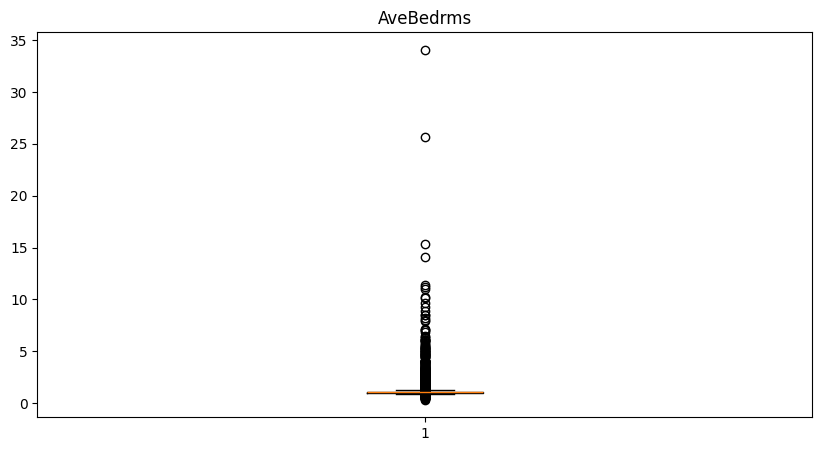

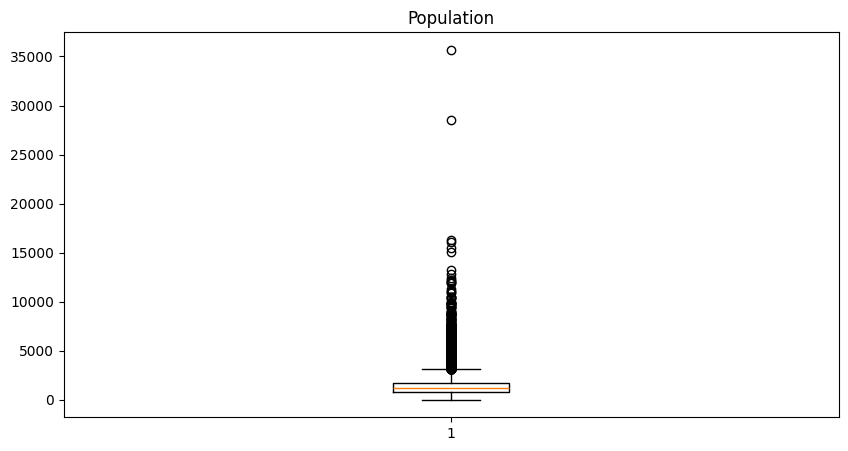

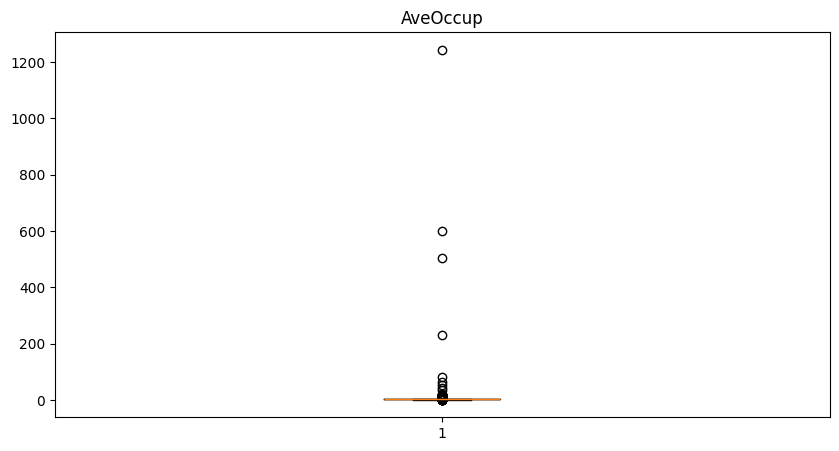

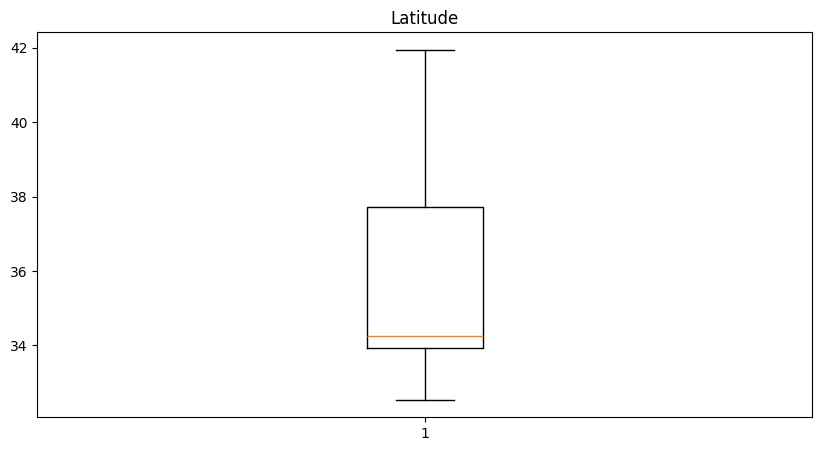

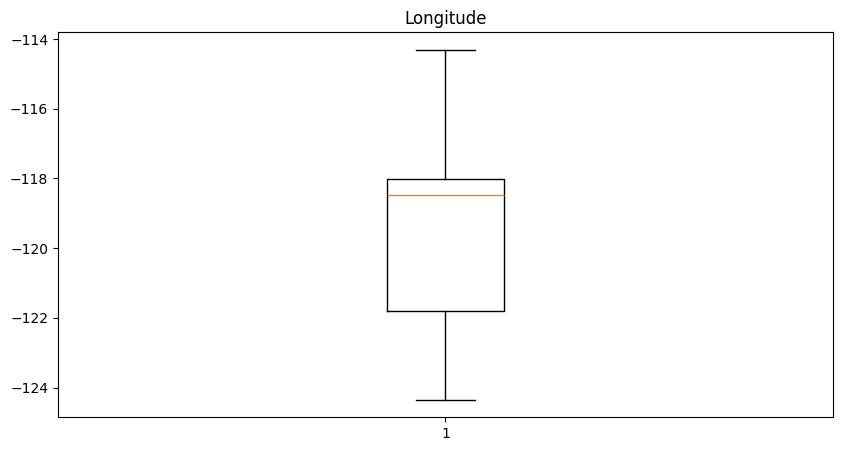

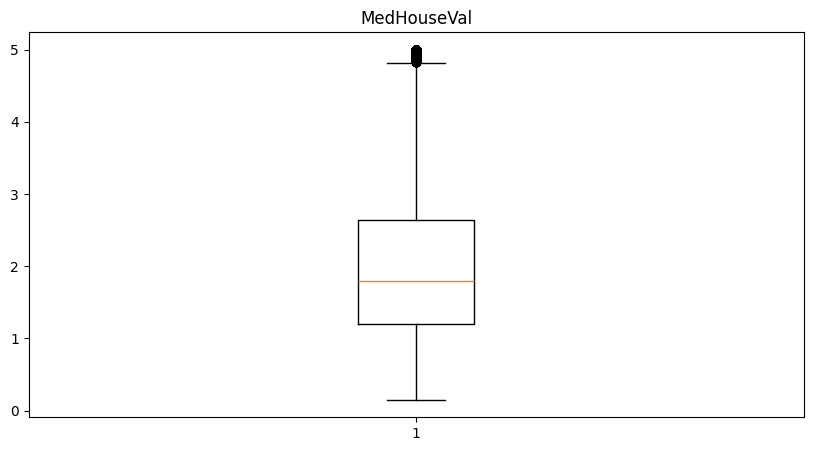

In [ ]:
for i in dff:
    plt.figure(figsize=(10,5))
    plt.boxplot(dff[i])
    plt.title(i)

In [ ]:
from scipy.stats.mstats import winsorize

dff['AveRooms'] = winsorize(dff['AveRooms'], limits = (0.05, 0.05))
dff['AveBedrms'] = winsorize(dff['AveBedrms'], limits = (0.10, 0.10))
dff['Population'] = winsorize(dff['Population'], limits = (0.10, 0.10))
dff['MedInc'] = winsorize(dff['MedInc'], limits = (0.05, 0.05))
dff['AveOccup'] = winsorize(dff['AveOccup'], limits = (0.05, 0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x78491677a000>,
 'caps': [<matplotlib.lines.Line2D at 0x784916778cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78491677a180>],
 'medians': [<matplotlib.lines.Line2D at 0x784916778650>],
 'fliers': [<matplotlib.lines.Line2D at 0x78491670a000>],
 'means': []}

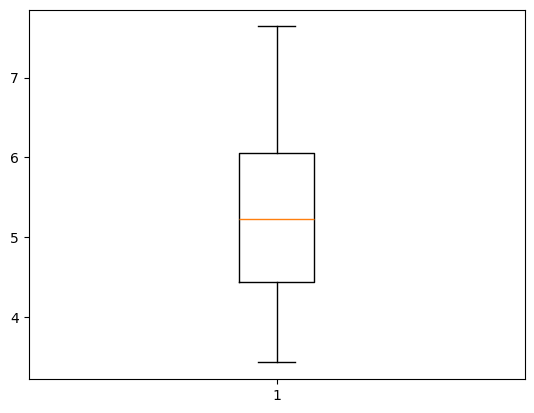

In [ ]:
plt.boxplot(dff['AveRooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x784918421250>,
 'caps': [<matplotlib.lines.Line2D at 0x7849184216a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x784918420f50>],
 'medians': [<matplotlib.lines.Line2D at 0x784918421ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x784918421f70>],
 'means': []}

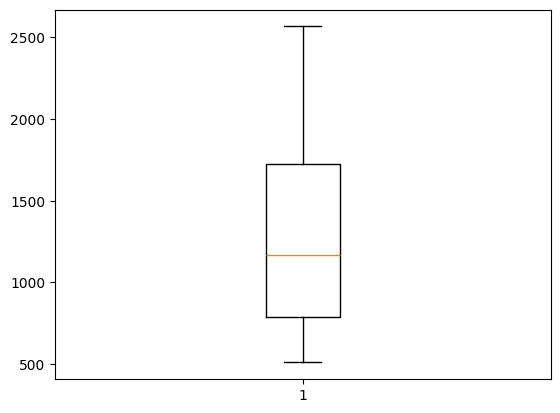

In [ ]:
plt.boxplot(dff['Population'])

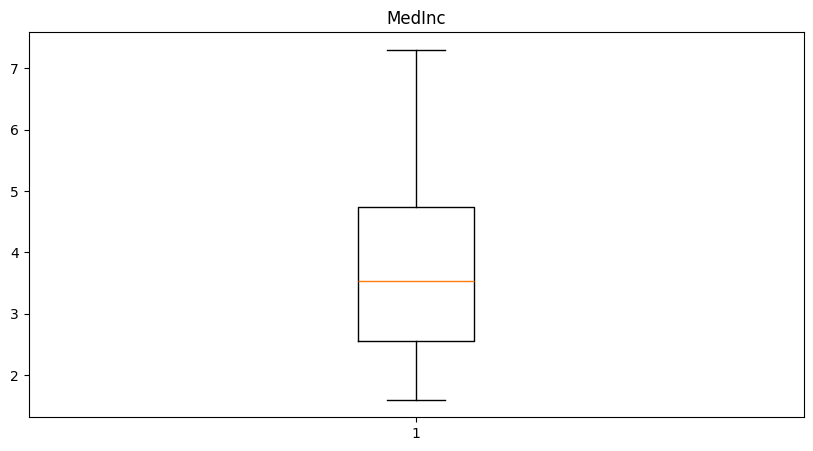

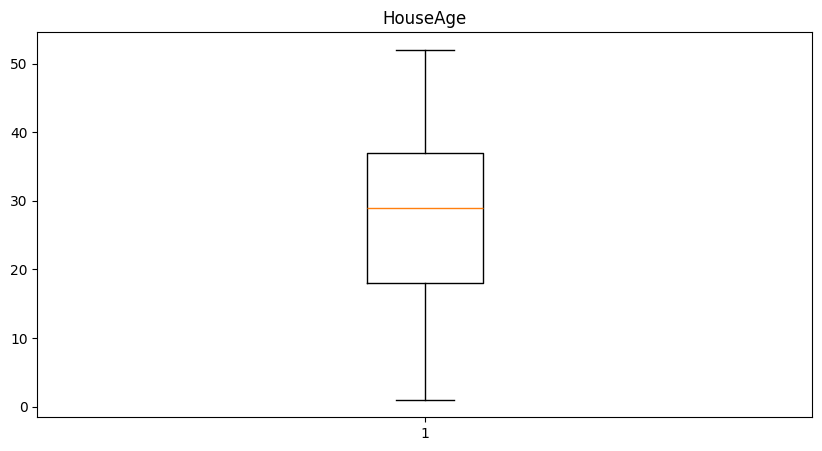

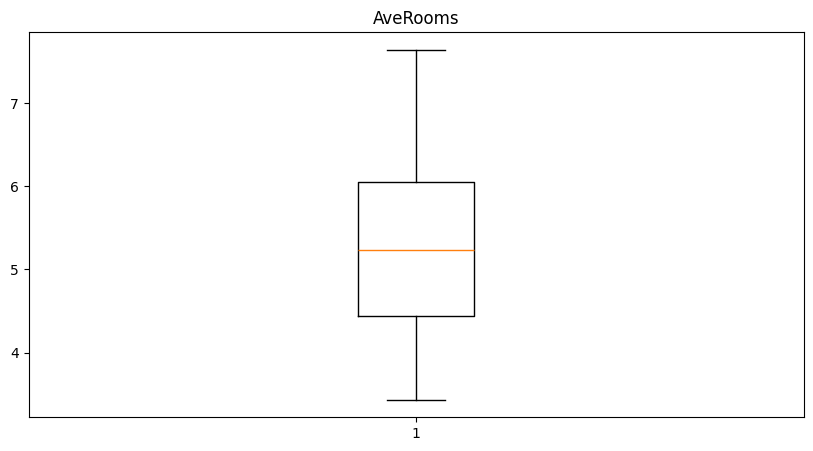

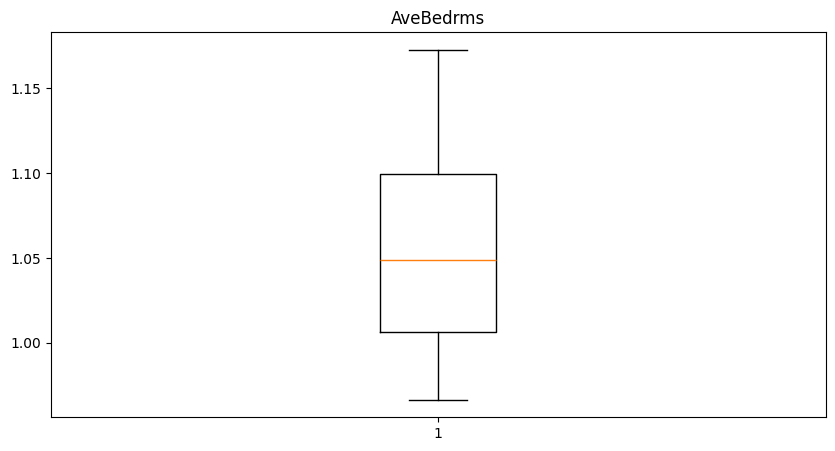

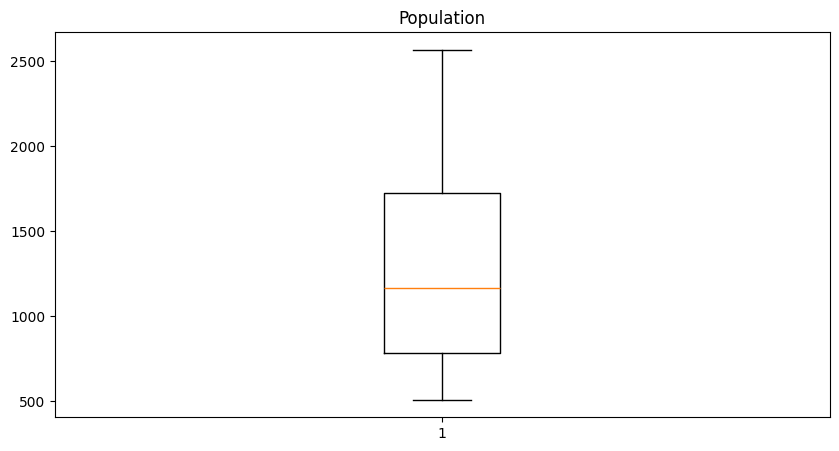

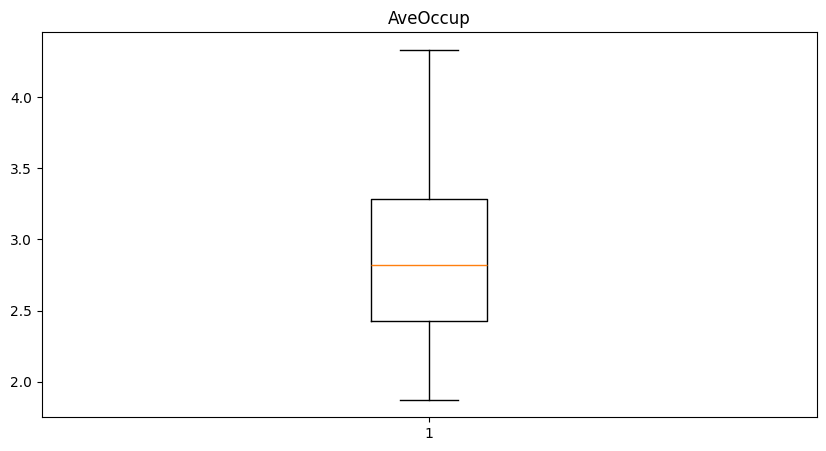

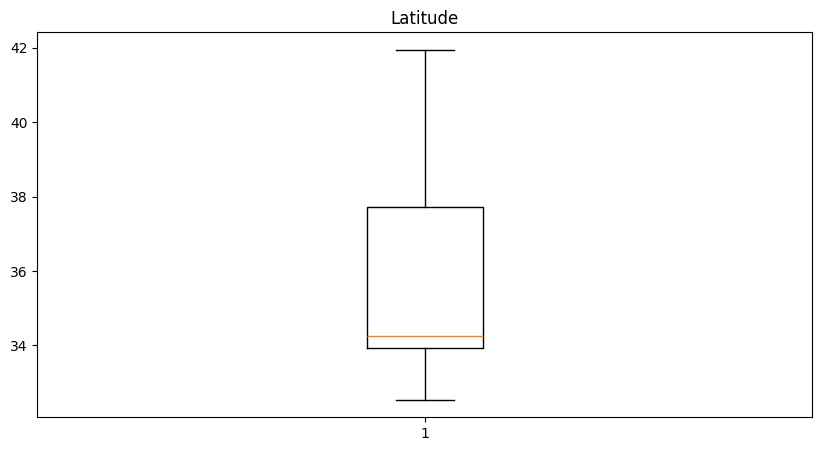

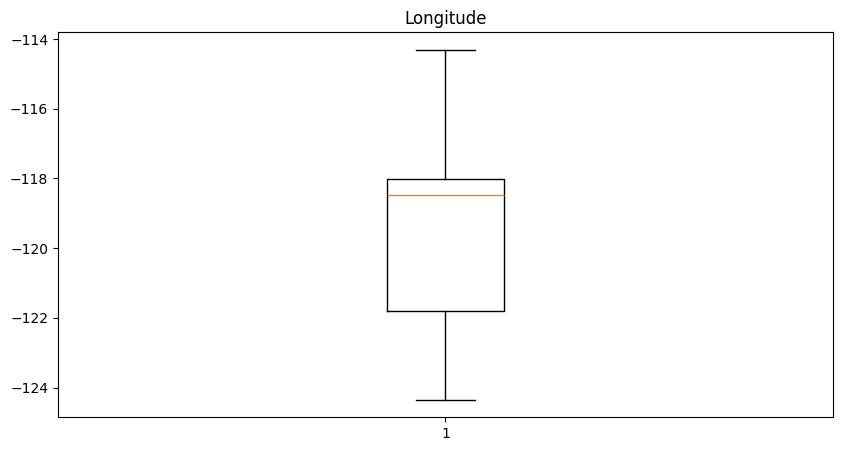

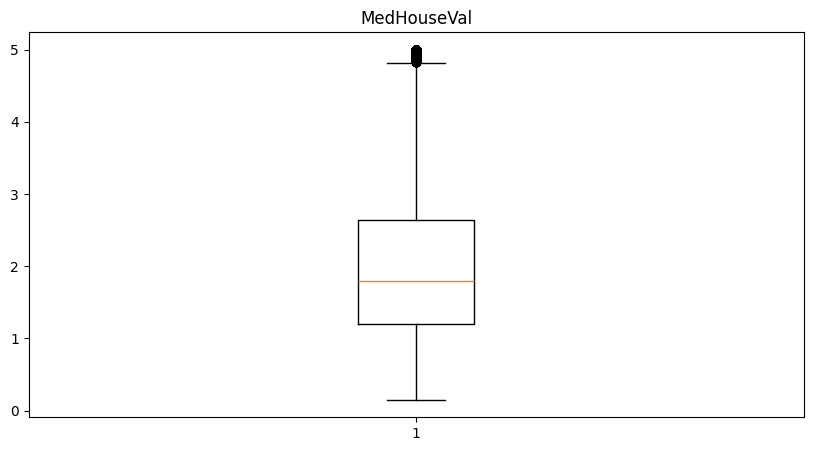

In [ ]:
for i in dff:
    plt.figure(figsize=(10,5))
    plt.boxplot(dff[i])
    plt.title(i)

In [ ]:
y = dff['MedHouseVal']
x = dff.drop(['MedHouseVal'], axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)

from sklearn import linear_model
lr = linear_model.LinearRegression()


In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.172727,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.172727,1310.0,1.872549,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,5.532213,0.974790,771.0,2.159664,34.04,-118.42
19755,2.1898,30.0,4.509091,0.966418,510.0,2.484848,40.18,-122.21
4885,2.1667,37.0,3.432331,1.056962,2173.0,4.333333,34.02,-118.26
13043,6.8869,6.0,7.382385,1.030075,2354.0,2.528464,38.51,-121.06


In [ ]:
predictions

array([0.1582474 , 1.97840896, 3.29370566, ..., 1.112191  , 2.79054741,
       3.98978659])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is : \n',mean_squared_error(y_test,predictions))


MSE is : 
 0.4641211011323933


In [ ]:
from sklearn.metrics import r2_score
print('R2 is : \n',r2_score(y_test,predictions))

R2 is : 
 0.649248223396348
